In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-land/land_use.csv


### removing missing values, duplicates and outliers

In [2]:
import pandas as pd

# Assuming your CSV file is named "your_file.csv"
file_path = "/kaggle/input/data-land/land_use.csv"

# Read the CSV file into a pandas DataFrame
original_df = pd.read_csv(file_path)

# Drop rows with missing values
df_no_nan = original_df.dropna()

# Drop duplicate rows
land_use_updated = df_no_nan.drop_duplicates()

# Resetting the index if needed
land_use_updated.reset_index(drop=True, inplace=True)


In [3]:
#land_use_updated.isnull().any()

In [4]:
from sklearn.preprocessing import StandardScaler

# Extract the first four columns
first_four_columns = land_use_updated.iloc[:, :4]

# Extract the remaining columns for scaling
remaining_columns = land_use_updated.iloc[:, 4:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the remaining columns
scaled_columns = pd.DataFrame(scaler.fit_transform(remaining_columns), columns=remaining_columns.columns)

# Concatenate the scaled columns with the first four columns
scaled_land_use_updated = pd.concat([first_four_columns, scaled_columns], axis=1)



In [5]:
#first_four_columns.shape, scaled_columns.shape

In [6]:
from scipy.stats import zscore

# Extract the first four columns
first_four_columns = land_use_updated.iloc[:, :4]

# Extract the remaining columns for scaling
remaining_columns = land_use_updated.iloc[:, 4:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the remaining columns
scaled_columns = pd.DataFrame(scaler.fit_transform(remaining_columns), columns=remaining_columns.columns)

# Concatenate the scaled columns with the first four columns
scaled_land_use_updated = pd.concat([first_four_columns, scaled_columns], axis=1)

# Calculate z-scores for each column in the scaled DataFrame (excluding the first four columns)
z_scores = zscore(scaled_land_use_updated.iloc[:, 4:])

# Define a threshold for considering a data point as an outlier
threshold = 4

# Create a boolean mask indicating whether each row has outliers
outlier_mask = (np.abs(z_scores) < threshold).all(axis=1)

# Apply the mask to retain non-outliers
cleaned_scaled_land_use = scaled_land_use_updated[outlier_mask]

# Display the resulting DataFrame after removing outliers
#print(cleaned_scaled_land_use)


In [7]:
#cleaned_scaled_land_use.shape

### Elbow method for K means

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

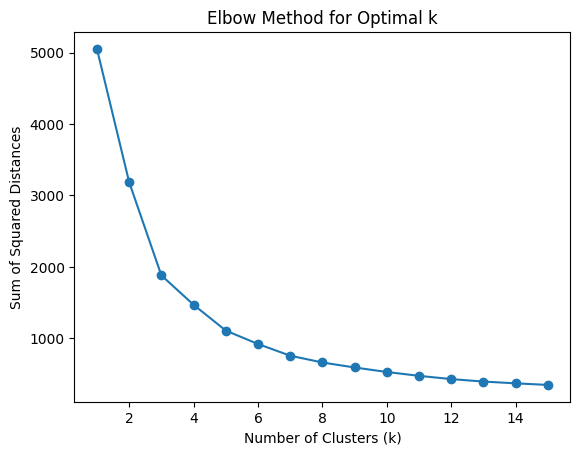

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your data from the CSV file
# file_path = '/kaggle/input/data-land/land_use.csv'  # Replace 'your_file.csv' with the actual file name
df = cleaned_scaled_land_use

# Select all features for clustering
all_features = df[['Reported land area ', 'Forest land area', 'Land area under non-agricultural uses',
                   'Barren and unculturable land area', 'Permanent pasture and other grazing land area',
                   'Land under miscellaneous Tree Crops and Groves not included in Net Area Sown',
                   'Culturable waste land area', 'Fallow lands other than current fallow lands',
                   'Current Fallow land area', 'Net sown land area', 'Cropped land area',
                   'Land area sown more than once']]

# Drop rows with missing values
# all_features_cleaned = all_features.dropna()

# Initialize a list to store the sum of squared distances (inertia) for different values of k
inertia = []

# Choose two features based on their names
f1 = 'Forest land area'  # Name of the first feature
f2 = 'Cropped land area'  # Name of the second feature
selected_features = all_features[[f1, f2]]

# Try different values of k (e.g., from 1 to 10)
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 16), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')

# Save the figure
plt.savefig('elbow_curve.png')

# Show the figure
plt.show()


### applying K means

In [ ]:
# Specify the number of clusters (adjust as needed)
num_clusters = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(selected_features)

# Add a column to identify the data points
df['point_number'] = range(1, len(df) + 1)

# Visualize the clusters (scatter plot with centroids)
plt.scatter(df[f1], df[f2], c=df['cluster'], cmap='viridis', s=10, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('KMeans Clustering with Centroids')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()
# Save the figure
plt.savefig('K_means.png')
plt.show()


# Save the resulting DataFrame to a CSV file
result_file = 'clustered_data1.csv'
df.to_csv(result_file, index=False)


In [ ]:
import time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Specify the range of clusters you want to test
min_clusters = 2
max_clusters = 10

# Initialize lists to store silhouette scores and execution times
silhouette_scores = []
execution_times = []

# Iterate over different cluster numbers
for num_clusters in range(min_clusters, max_clusters + 1):
    start_time = time.time()
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(selected_features)
    
    # Calculate silhouette score
    silhouette = silhouette_score(selected_features, df['cluster'])
    silhouette_scores.append(silhouette)
    
    # Measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot Silhouette Score vs Number of Clusters
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters(KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.savefig('Silhouette Score vs Number of Clusters(KMeans)')
plt.show()

# Plot Execution Time vs Number of Clusters
plt.plot(range(min_clusters, max_clusters + 1), execution_times, marker='o')
plt.title('Execution Time vs Number of Clusters(KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Execution Time (seconds)')
plt.savefig('Execution Time vs Number of Clusters(KMeans)')
plt.show()


### GMM

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Assume you have your data in the variable 'selected_features'

# Define a range of cluster numbers to try
n_components_range = range(1, 11)

# Fit GMM models for each cluster number and calculate AIC
aic_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(selected_features)
    aic_scores.append(gmm.aic(selected_features))

# Plot the AIC scores
plt.plot(n_components_range, aic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score')
plt.title('AIC Score for Different Numbers of Clusters(GMM)')
plt.savefig('AIC Score for Different Numbers of Clusters(GMM)')
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Specify the number of clusters (adjust as needed)
num_clusters = 4

# Apply GMM clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
df['cluster'] = gmm.fit_predict(selected_features)

# Add a column to identify the data points
df['point_number'] = range(1, len(df) + 1)

# Visualize the clusters (scatter plot without centroids in GMM)
plt.scatter(df[f1], df[f2], c=df['cluster'], cmap='viridis', s=10, label='Data Points')
plt.title('GMM Clustering')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()
plt.savefig('GMM Clustering')
plt.show()

# Save the resulting DataFrame to a CSV file
result_file = 'clustered_data2.csv'
df.to_csv(result_file, index=False)


In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Specify the range of components you want to test
min_components = 2
max_components = 10

# Initialize lists to store silhouette scores and execution times
silhouette_scores_gmm = []
execution_times_gmm = []

# Iterate over different component numbers
for num_components in range(min_components, max_components + 1):
    start_time = time.time()
    
    # Apply GMM clustering
    gmm = GaussianMixture(n_components=num_components, random_state=42)
    df['cluster'] = gmm.fit_predict(selected_features)
    
    # Calculate silhouette score
    silhouette_gmm = silhouette_score(selected_features, df['cluster'])
    silhouette_scores_gmm.append(silhouette_gmm)
    
    # Measure execution time
    end_time = time.time()
    execution_time_gmm = end_time - start_time
    execution_times_gmm.append(execution_time_gmm)

# Plot Silhouette Score vs Number of Components
plt.plot(range(min_components, max_components + 1), silhouette_scores_gmm, marker='o')
plt.title('Silhouette Score vs Number of Components (GMM)')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.savefig('Silhouette Score vs Number of Components (GMM)')
plt.show()

# Plot Execution Time vs Number of Components
plt.plot(range(min_components, max_components + 1), execution_times_gmm, marker='o')
plt.title('Execution Time vs Number of Components (GMM)')
plt.xlabel('Number of Components')
plt.ylabel('Execution Time (seconds)')
plt.savefig('Execution Time vs Number of Components (GMM)')
plt.show()


### 3D

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D  

all_features = cleaned_scaled_land_use[['Reported land area ', 'Forest land area', 'Land area under non-agricultural uses',
                   'Barren and unculturable land area', 'Permanent pasture and other grazing land area',
                   'Land under miscellaneous Tree Crops and Groves not included in Net Area Sown',
                   'Culturable waste land area', 'Fallow lands other than current fallow lands',
                   'Current Fallow land area', 'Net sown land area', 'Cropped land area',
                   'Land area sown more than once']]

# Initialize a list to store the sum of squared distances (inertia) for different values of k
inertia = []

# Choose three features based on their names
f1 = 'Net sown land area'  # Name of the first feature
f2 = 'Land area sown more than once' # Name of the second feature
f3 = 'Land area under non-agricultural uses'# Name of the third feature
selected_features = all_features[[f1, f2, f3]]

# Try different values of k (e.g., from 1 to 10)
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 16), inertia, marker='o')
plt.title('Elbow Method for Optimal k(3D)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.savefig('Elbow Method for Optimal k(3D)')
plt.show()
plt.show()


In [ ]:
# Specify the number of clusters (adjust as needed)
num_clusters = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cleaned_scaled_land_use['cluster'] = kmeans.fit_predict(selected_features)

# Visualize the clusters with a specific viewing angle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(
    cleaned_scaled_land_use[f1],
    cleaned_scaled_land_use[f2],
    cleaned_scaled_land_use[f3],
    c=cleaned_scaled_land_use['cluster'],
    cmap='viridis',
    s=10,
    label='Data Points'
)

# Set a specific viewing angle (azimuth and elevation)
ax.view_init(azim=7, elev=11)  # Adjust the azimuth and elevation as needed

ax.set_title('KMeans Clustering(3D)')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)  # Set the label for the z-axis
ax.legend()
plt.savefig('KMeans Clustering(3D)')
plt.show()


### PCA

### All & 4 features

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# # Step 2: Select the input features for PCA
# selected_features = df[['Reported land area ', 'Forest land area', 'Land area under non-agricultural uses',
#                         'Barren and unculturable land area', 'Permanent pasture and other grazing land area',
#                          'Land under miscellaneous Tree Crops and Groves not included in Net Area Sown',
#                          'Culturable waste land area', 'Fallow lands other than current fallow lands',
#                          'Current Fallow land area', 'Net sown land area', 'Cropped land area',
#                          'Land area sown more than once']]

selected_features = df[['Forest land area','Land area under non-agricultural uses','Barren and unculturable land area','Cropped land area',]]

# Step 5: Apply PCA
pca = PCA()
#selected_features_pca = pca.fit_transform(selected_features_standardized)
selected_features_pca = pca.fit_transform(selected_features)


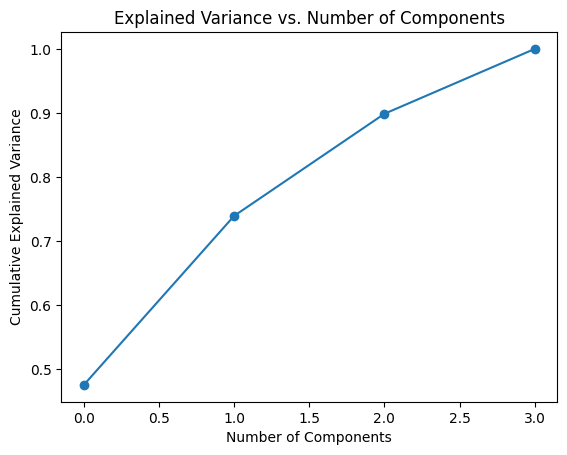

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'pca' is your PCA object
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.savefig('PCA_1')
plt.show()


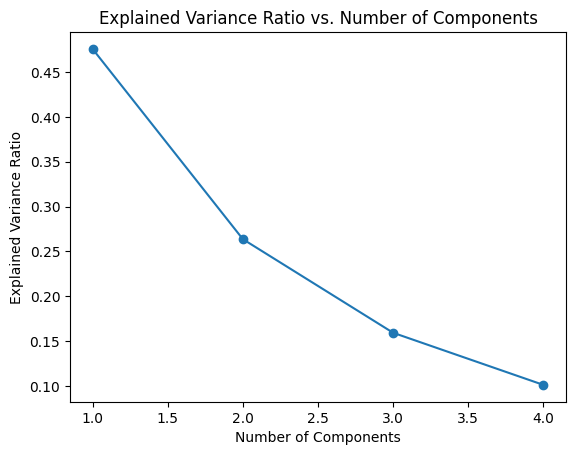

In [21]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.savefig('PCA_2')
plt.show()


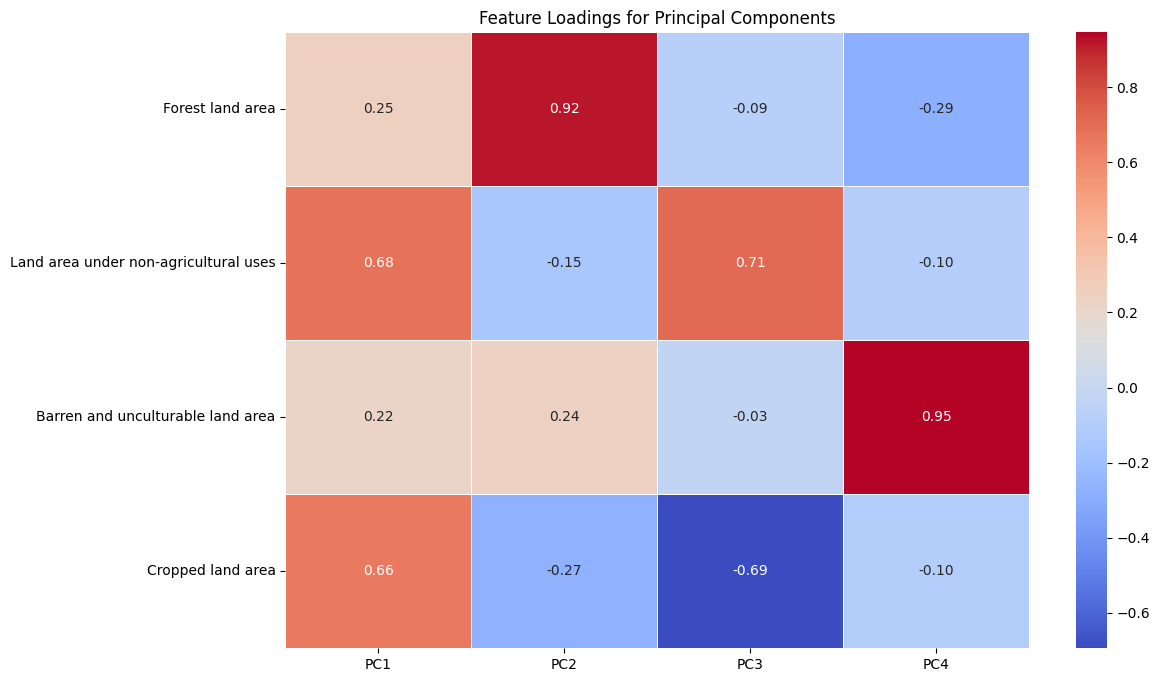

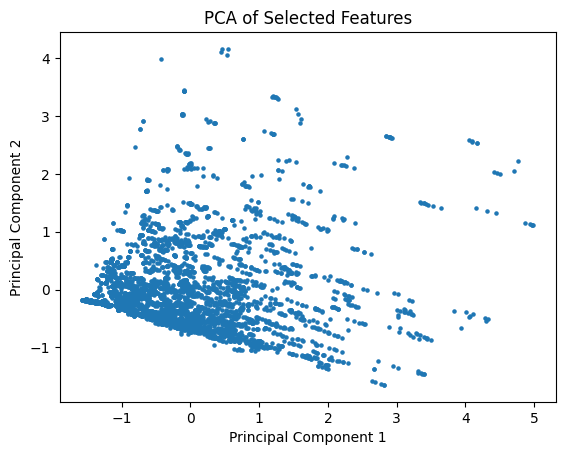

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# # Step 6: Print summary of PCA
# print("Explained Variance Ratio:")
# print(pca.explained_variance_ratio_)
# print("\nTotal Explained Variance (cumulative):")
# print(np.cumsum(pca.explained_variance_ratio_))

# Step 7: Get and display feature loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
loadings.index = selected_features.columns

# Display the loadings using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Feature Loadings for Principal Components')
plt.savefig('PCA_3')
plt.show()

# Step 8: Visualize the results (scatter plot for 2D PCA)
plt.scatter(selected_features_pca[:, 0], selected_features_pca[:, 1], s=5)  # Adjust the marker size as needed
plt.title('PCA of Selected Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('PCA_4')
plt.show()


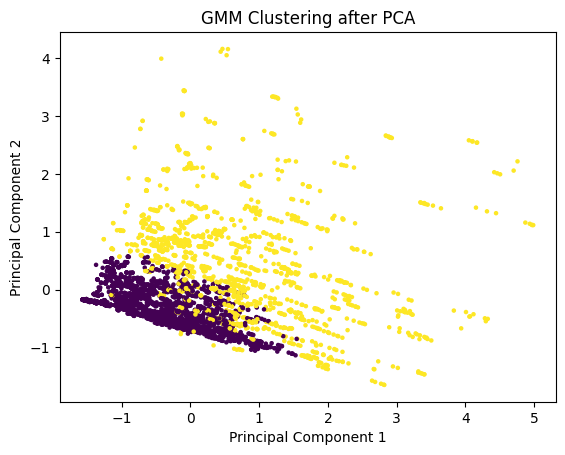

In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming selected_features_pca is the result of your PCA
# Replace this with your actual PCA result
# selected_features_pca = ...

# Step 9: Choose the number of clusters for GMM
n_clusters = 2  # You can choose any suitable number of clusters

# Step 10: Fit GMM model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(selected_features_pca)

# Step 11: Predict cluster labels
cluster_labels = gmm.predict(selected_features_pca)

# Step 12: Visualize the clustering results
plt.scatter(selected_features_pca[:, 0], selected_features_pca[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.title('GMM Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label='Cluster')
plt.savefig('GMM_Clustering_after_PCA')
plt.show()


### t sne

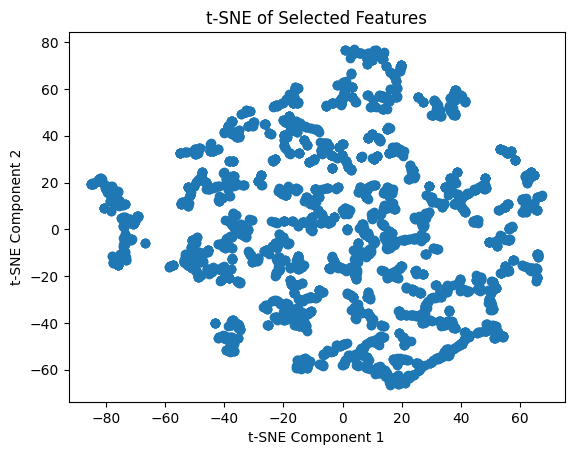

In [27]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE without fixing the number of components
tsne = TSNE(random_state=42)
selected_features_tsne = tsne.fit_transform(selected_features)

# Visualize the results (scatter plot for t-SNE)
plt.scatter(selected_features_tsne[:, 0], selected_features_tsne[:, 1])
plt.title('t-SNE of Selected Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.savefig('t-SNE')
plt.show()


## Extra

### 2D k means combined

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import zscore

# # Assuming 'land_use_updated' is your original DataFrame
# # Extract the first four columns
# first_four_columns = land_use_updated.iloc[:, :4]

# # Extract the remaining columns for scaling
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the remaining columns
# scaled_columns = pd.DataFrame(scaler.fit_transform(remaining_columns), columns=remaining_columns.columns)

# # Concatenate the scaled columns with the first four columns
# scaled_land_use_updated = pd.concat([first_four_columns, scaled_columns], axis=1)

# # Calculate z-scores for each column in the scaled DataFrame (excluding the first four columns)
# z_scores = zscore(scaled_land_use_updated.iloc[:, 4:])

# # Define a threshold for considering a data point as an outlier
# threshold = 4

# # Create a boolean mask indicating whether each row has outliers
# outlier_mask = (np.abs(z_scores) < threshold).all(axis=1)

# # Apply the mask to retain non-outliers
# cleaned_scaled_land_use = scaled_land_use_updated[outlier_mask]

# # Display the resulting DataFrame after removing outliers
# #print(cleaned_scaled_land_use)

# # Select all features for clustering
# all_features = cleaned_scaled_land_use[['Reported land area ', 'Forest land area', 'Land area under non-agricultural uses',
#                    'Barren and unculturable land area', 'Permanent pasture and other grazing land area',
#                    'Land under miscellaneous Tree Crops and Groves not included in Net Area Sown',
#                    'Culturable waste land area', 'Fallow lands other than current fallow lands',
#                    'Current Fallow land area', 'Net sown land area', 'Cropped land area',
#                    'Land area sown more than once']]

# # Initialize a list to store the sum of squared distances (inertia) for different values of k
# inertia = []

# # Choose two features based on their names
# f1 = 'Net sown land area'  # Name of the first feature
# f2 = 'Land area sown more than once'  # Name of the second feature
# selected_features = all_features[[f1, f2]]

# # Try different values of k (e.g., from 1 to 10)
# for k in range(1, 16):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(selected_features)
#     inertia.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.plot(range(1, 16), inertia, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Sum of Squared Distances')
# plt.show()

# # Specify the number of clusters (adjust as needed)
# num_clusters = 7

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cleaned_scaled_land_use['cluster'] = kmeans.fit_predict(selected_features)

# # Visualize the clusters (scatter plot with centroids)
# plt.scatter(cleaned_scaled_land_use[f1], cleaned_scaled_land_use[f2], c=cleaned_scaled_land_use['cluster'], cmap='viridis', s=10, label='Data Points')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
# plt.title('KMeans Clustering with Centroids')
# plt.xlabel(f1)
# plt.ylabel(f2)
# plt.legend()
# plt.show()

# # Save the resulting DataFrame to a CSV file
# result_file = 'clustered_data.csv'
# cleaned_scaled_land_use.to_csv(result_file, index=False)


### 3D k means

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import zscore
# from mpl_toolkits.mplot3d import Axes3D  # Import necessary module for 3D scatter plot

# # Assuming 'land_use_updated' is your original DataFrame
# # Extract the first four columns
# first_four_columns = land_use_updated.iloc[:, :4]

# # Extract the remaining columns for scaling
# remaining_columns = land_use_updated.iloc[:, 4:]

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the remaining columns
# scaled_columns = pd.DataFrame(scaler.fit_transform(remaining_columns), columns=remaining_columns.columns)

# # Concatenate the scaled columns with the first four columns
# scaled_land_use_updated = pd.concat([first_four_columns, scaled_columns], axis=1)

# # Calculate z-scores for each column in the scaled DataFrame (excluding the first four columns)
# z_scores = zscore(scaled_land_use_updated.iloc[:, 4:])

# # Define a threshold for considering a data point as an outlier
# threshold = 4

# # Create a boolean mask indicating whether each row has outliers
# outlier_mask = (np.abs(z_scores) < threshold).all(axis=1)

# # Apply the mask to retain non-outliers
# cleaned_scaled_land_use = scaled_land_use_updated[outlier_mask]

# # Display the resulting DataFrame after removing outliers
# # print(cleaned_scaled_land_use)

# # Select all features for clustering
# all_features = cleaned_scaled_land_use[['Reported land area ', 'Forest land area', 'Land area under non-agricultural uses',
#                    'Barren and unculturable land area', 'Permanent pasture and other grazing land area',
#                    'Land under miscellaneous Tree Crops and Groves not included in Net Area Sown',
#                    'Culturable waste land area', 'Fallow lands other than current fallow lands',
#                    'Current Fallow land area', 'Net sown land area', 'Cropped land area',
#                    'Land area sown more than once']]

# # Initialize a list to store the sum of squared distances (inertia) for different values of k
# inertia = []

# # Choose three features based on their names
# f1 = 'Net sown land area'  # Name of the first feature
# f2 = 'Land area sown more than once' # Name of the second feature
# f3 = 'Land area under non-agricultural uses'# Name of the third feature
# selected_features = all_features[[f1, f2, f3]]

# # Try different values of k (e.g., from 1 to 10)
# for k in range(1, 16):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(selected_features)
#     inertia.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.plot(range(1, 16), inertia, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Sum of Squared Distances')
# plt.show()

# # # Specify the number of clusters (adjust as needed)
# # num_clusters = 9

# # # Apply KMeans clustering
# # kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# # cleaned_scaled_land_use['cluster'] = kmeans.fit_predict(selected_features)

# # # Visualize the clusters (scatter plot with centroids)
# # fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# # ax.scatter(
# #     cleaned_scaled_land_use[f1],
# #     cleaned_scaled_land_use[f2],
# #     cleaned_scaled_land_use[f3],
# #     c=cleaned_scaled_land_use['cluster'],
# #     cmap='viridis',
# #     s=10,
# #     label='Data Points'
# # )

# # ax.scatter(
# #     kmeans.cluster_centers_[:, 0],
# #     kmeans.cluster_centers_[:, 1],
# #     kmeans.cluster_centers_[:, 2],  # Add the third dimension
# #     marker='X',
# #     s=200,
# #     c='red',
# #     label='Centroids'
# # )

# # ax.set_title('KMeans Clustering with Centroids')
# # ax.set_xlabel(f1)
# # ax.set_ylabel(f2)
# # ax.set_zlabel(f3)  # Set the label for the z-axis
# # ax.legend()
# # plt.show()

# # # Save the resulting DataFrame to a CSV file
# # result_file = 'clustered_data.csv'
# # cleaned_scaled_land_use.to_csv(result_file, index=False)

# # # Specify the number of clusters (adjust as needed)
# num_clusters = 9

# # # Apply KMeans clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cleaned_scaled_land_use['cluster'] = kmeans.fit_predict(selected_features)

# # # Visualize the clusters (scatter plot with centroids)
# # fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot


# # Visualize the clusters with a specific viewing angle
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# ax.scatter(
#     cleaned_scaled_land_use[f1],
#     cleaned_scaled_land_use[f2],
#     cleaned_scaled_land_use[f3],
#     c=cleaned_scaled_land_use['cluster'],
#     cmap='viridis',
#     s=10,
#     label='Data Points'
# )

# # Set a specific viewing angle (azimuth and elevation)
# ax.view_init(azim=45, elev=30)  # Adjust the azimuth and elevation as needed

# ax.set_title('KMeans Clustering without Centroids')
# ax.set_xlabel(f1)
# ax.set_ylabel(f2)
# ax.set_zlabel(f3)  # Set the label for the z-axis
# ax.legend()
# plt.show()



In [ ]:
# # # Specify the number of clusters (adjust as needed)
# num_clusters = 9

# # # Apply KMeans clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cleaned_scaled_land_use['cluster'] = kmeans.fit_predict(selected_features)

# # # Visualize the clusters (scatter plot with centroids)
# # fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot


# # Visualize the clusters with a specific viewing angle
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# ax.scatter(
#     cleaned_scaled_land_use[f1],
#     cleaned_scaled_land_use[f2],
#     cleaned_scaled_land_use[f3],
#     c=cleaned_scaled_land_use['cluster'],
#     cmap='viridis',
#     s=10,
#     label='Data Points'
# )

# # Set a specific viewing angle (azimuth and elevation)
# ax.view_init(azim=60, elev=20)  # Adjust the azimuth and elevation as needed

# ax.set_title('KMeans Clustering without Centroids')
# ax.set_xlabel(f1)
# ax.set_ylabel(f2)
# ax.set_zlabel(f3)  # Set the label for the z-axis
# ax.legend()
# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import plotly.express as px
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import zscore

# # Assuming 'land_use_updated' is your original DataFrame
# # (Previous code)

# # Specify the number of clusters (adjust as needed)
# num_clusters = 7

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cleaned_scaled_land_use['cluster'] = kmeans.fit_predict(selected_features)

# # Visualize the clusters with plotly express
# fig = px.scatter_3d(
#     cleaned_scaled_land_use,
#     x=f1,
#     y=f2,
#     z=f3,
#     color='cluster',
#     size_max=5,  # Adjust the size of data points
#     opacity=0.8,
#     title='KMeans Clustering',
#     labels={f1: f1, f2: f2, f3: f3, 'cluster': 'Cluster'},
# )

# fig.update_layout(scene=dict(aspectmode="cube"))

# # Show the interactive plot
# fig.show()


### AIC

In [ ]:
# from sklearn.mixture import GaussianMixture
# import numpy as np
# import matplotlib.pyplot as plt

# # Assume you have your data in the variable 'selected_features'

# # Define a range of cluster numbers to try
# n_components_range = range(1, 11)

# # Fit GMM models for each cluster number and calculate BIC
# bic_scores = []
# for n_components in n_components_range:
#     gmm = GaussianMixture(n_components=n_components, random_state=42)
#     gmm.fit(selected_features)
#     bic_scores.append(gmm.bic(selected_features))

# # Plot the BIC scores
# plt.plot(n_components_range, bic_scores, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('BIC Score')
# plt.title('BIC Score for Different Numbers of Clusters')
# plt.show()


### PCA

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame with the selected features

# # Step 2: Select the input features for PCA
# #selected_features = df[['Reported land area ', 'Forest land area', 'Land area under non-agricultural uses',
# #                         'Barren and unculturable land area', 'Permanent pasture and other grazing land area',
# #                         'Land under miscellaneous Tree Crops and Groves not included in Net Area Sown',
# #                         'Culturable waste land area', 'Fallow lands other than current fallow lands',
# #                         'Current Fallow land area', 'Net sown land area', 'Cropped land area',
# #                         'Land area sown more than once']]

# # Step 4: Standardize the selected features
# # scaler = StandardScaler()
# # selected_features_standardized = scaler.fit_transform(selected_features)

# # Step 5: Apply PCA
# pca = PCA()
# selected_features_pca = pca.fit_transform(selected_features)

# # Step 6: Print summary of PCA
# print("Explained Variance Ratio:")
# print(pca.explained_variance_ratio_)
# print("\nTotal Explained Variance (cumulative):")
# print(np.cumsum(pca.explained_variance_ratio_))

# # Step 7: Get and display feature loadings
# loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
# loadings.index = selected_features.columns

# # Display the loadings
# print("\nFeature Loadings:")
# print(loadings)

# # Step 8: Visualize the results (scatter plot for 2D PCA)
# plt.scatter(selected_features_pca[:, 0], selected_features_pca[:, 1])
# plt.title('PCA of Selected Features')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()
